In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.signal import lfilter

In [2]:
import chardet
import pandas as pd

with open('insurancedata.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df=pd.read_csv('insurancedata.csv', encoding=result['encoding'])
df.head()

,InvoiceNo,InsuranceCode,Quantity,InvoiceDate,Premium,CustomerID,State,Age,AnnualIncome
0,536365,85123A,6,12-01-2010 08:26,2.55,17850.0,Maharashtra,44,12928482
1,536373,85123A,6,12-01-2010 09:02,2.55,17850.0,Maharashtra,32,5616781
2,536375,85123A,6,12-01-2010 09:32,2.55,17850.0,Maharashtra,57,7807879
3,536378,20725,10,12-01-2010 09:37,1.65,14688.0,Maharashtra,30,7293569
4,536386,85099B,100,12-01-2010 09:57,1.65,16029.0,Maharashtra,38,19938343


In [3]:
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [4]:
df['Quantity'] = df['Quantity'].mask(df['Quantity'] < 0, 10)

In [5]:
df['Age'] = df['Age'].mask(df['InsuranceCode'] == '85123A', np.random.randint(10, 20, df.shape[0]))

In [6]:
df['Age'] = df['Age'].mask(df['InsuranceCode'] == '22423', np.random.randint(21, 30, df.shape[0]))

In [7]:
df['Age'] = df['Age'].mask(df['InsuranceCode'] == '85099B', np.random.randint(25, 35, df.shape[0]))

In [8]:
df['Age'] = df['Age'].mask(df['InsuranceCode'] == '47566', np.random.randint(30, 45, df.shape[0]))

In [9]:
df['Age'] = df['Age'].mask(df['InsuranceCode'] == '20725', np.random.randint(40, 50, df.shape[0]))

In [10]:
df['AnnualIncome'] = df['AnnualIncome'].mask(df['InsuranceCode'] == '85123A', np.random.randint(500000, 2000000, df.shape[0]))

In [11]:
df['AnnualIncome'] = df['AnnualIncome'].mask(df['InsuranceCode'] == '22423', np.random.randint(300000, 500000, df.shape[0]))

In [12]:
df['AnnualIncome'] = df['AnnualIncome'].mask(df['InsuranceCode'] == '85099B', np.random.randint(2500000, 3000000, df.shape[0]))

In [13]:
df['AnnualIncome'] = df['AnnualIncome'].mask(df['InsuranceCode'] == '47566', np.random.randint(1000000, 2000000, df.shape[0]))

In [14]:
df['AnnualIncome'] = df['AnnualIncome'].mask(df['InsuranceCode'] == '20725', np.random.randint(500000, 3500000, df.shape[0]))

In [15]:
df.index=df['InvoiceDate']

In [16]:
df

,InvoiceNo,InsuranceCode,Quantity,InvoiceDate,Premium,CustomerID,State,Age,AnnualIncome
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,Maharashtra,18,519403
2010-12-01 09:02:00,536373,85123A,6,2010-12-01 09:02:00,2.55,17850.0,Maharashtra,10,954706
2010-12-01 09:32:00,536375,85123A,6,2010-12-01 09:32:00,2.55,17850.0,Maharashtra,12,1258654
2010-12-01 09:37:00,536378,20725,10,2010-12-01 09:37:00,1.65,14688.0,Maharashtra,49,1926929
2010-12-01 09:57:00,536386,85099B,100,2010-12-01 09:57:00,1.65,16029.0,Maharashtra,31,2521854
2010-12-01 10:19:00,536390,85123A,64,2010-12-01 10:19:00,2.55,17511.0,Maharashtra,12,1835901
2010-12-01 10:19:00,536390,85099B,100,2010-12-01 10:19:00,1.65,17511.0,Maharashtra,31,2878792
2010-12-01 10:39:00,536394,85123A,32,2010-12-01 10:39:00,2.55,13408.0,Maharashtra,18,1062543
2010-12-01 10:51:00,536396,85123A,6,2010-12-01 10:51:00,2.55,17850.0,Maharashtra,16,1816499


In [17]:
x=df['InsuranceCode'].value_counts()
df2 = x.rename_axis('InsuranceCode').reset_index(name='counts')
pd.DataFrame(df2)

,InsuranceCode,counts
0,85123A,2313
1,22423,2203
2,85099B,2159
3,47566,1727
4,20725,1639


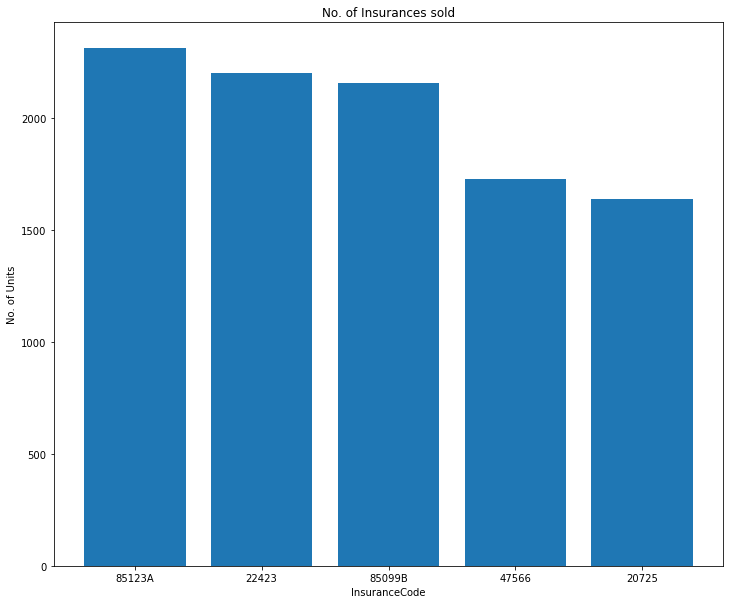

In [18]:
serial = [1,2,3,4,5]

plt.figure(figsize=(12,10))
           
LABELS=["85123A", "22423", "85099B","47566","20725"]

plt.bar(serial, df2['counts'], align='center')
plt.xticks(serial, LABELS)
plt.ylabel('No. of Units')
plt.xlabel('InsuranceCode')
plt.title("No. of Insurances sold")
plt.savefig('1.jpg',dpi=100)
plt.show()

In [19]:
foo=df.ix[(df['InsuranceCode']=="85123A")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


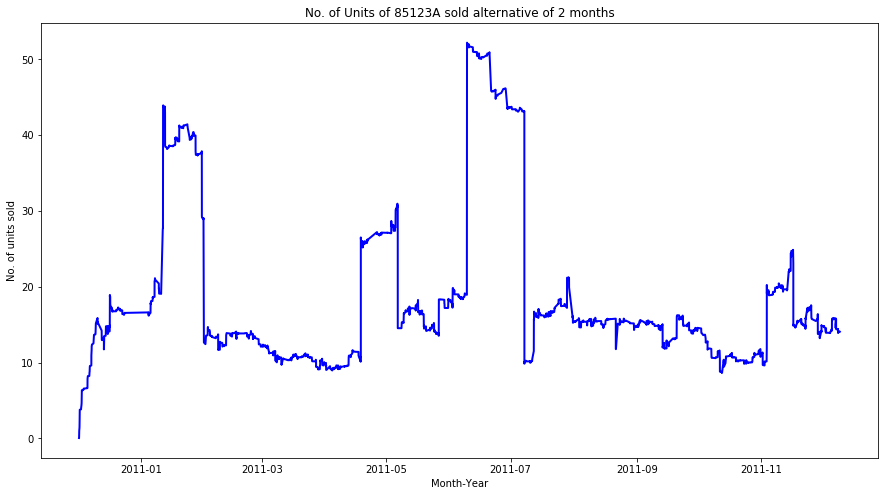

In [20]:
plt.figure(figsize=(15,8))
n = 120  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['Quantity'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('No. of units sold')
plt.title('No. of Units of 85123A sold alternative of 2 months')
plt.savefig('2.jpg',dpi=100)

In [21]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Debadri\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
ts_insure1=foo[['InvoiceDate','Quantity']]

In [23]:
ts_insure1 = ts_insure1.reset_index(drop=True)

In [24]:
ts_insure1.dtypes

InvoiceDate    datetime64[ns]
Quantity                int64
dtype: object

In [25]:
ts_insure1['Quantity']= ts_insure1['Quantity'].astype(np.float64)

In [26]:
data = pd.Series(ts_insure1.Quantity.values, 
                 index=ts_insure1.InvoiceDate)

In [27]:
X=data.values

In [28]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
expected=[]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    expected.append(obs)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=16.171869, expected=6.000000
predicted=10.487136, expected=9.000000
predicted=10.432426, expected=4.000000
predicted=9.986133, expected=10.000000
predicted=12.481137, expected=5.000000
predicted=6.378665, expected=6.000000
predicted=6.577760, expected=32.000000
predicted=10.844754, expected=6.000000
predicted=9.976064, expected=12.000000
predicted=11.639782, expected=32.000000
predicted=14.834128, expected=2.000000
predicted=14.293377, expected=2.000000
predicted=15.578360, expected=3.000000
predicted=9.358080, expected=32.000000
predicted=13.656146, expected=2.000000
predicted=13.527055, expected=32.000000
predicted=11.358015, expected=32.000000
predicted=16.151555, expected=2.000000
predicted=16.042500, expected=64.000000
predicted=27.725598, expected=10.000000
predicted=22.158572, expected=12.000000
predicted=25.688559, expected=32.000000
predicted=26.049800, expected=1.000000
predicted=18.822794, expected=3.000000
predicted=23.450491, expected=12.000000
predicted=11.65267

predicted=6.379715, expected=10.000000
predicted=5.406961, expected=6.000000
predicted=5.982029, expected=6.000000
predicted=7.323686, expected=128.000000
predicted=24.514308, expected=224.000000
predicted=59.066163, expected=6.000000
predicted=58.953539, expected=3.000000
predicted=58.333801, expected=15.000000
predicted=60.649819, expected=1.000000
predicted=67.717321, expected=3.000000
predicted=55.003344, expected=12.000000
predicted=6.647679, expected=2.000000
predicted=5.740652, expected=2.000000
predicted=6.442673, expected=6.000000
predicted=4.108640, expected=1.000000
predicted=4.205579, expected=32.000000
predicted=9.342310, expected=10.000000
predicted=8.287242, expected=6.000000
predicted=8.871346, expected=3.000000
predicted=9.483048, expected=12.000000
predicted=9.995314, expected=3.000000
predicted=12.471203, expected=2.000000
predicted=6.242750, expected=64.000000
predicted=14.389854, expected=6.000000
predicted=14.024103, expected=12.000000
predicted=16.045967, expecte

predicted=14.009244, expected=6.000000
predicted=15.998975, expected=64.000000
predicted=20.081510, expected=2.000000
predicted=13.110696, expected=4.000000
predicted=13.937168, expected=1.000000
predicted=13.514262, expected=5.000000
predicted=13.123581, expected=2.000000
predicted=16.608274, expected=14.000000
predicted=4.444935, expected=4.000000
predicted=4.893606, expected=4.000000
predicted=4.665242, expected=2.000000
predicted=5.171349, expected=12.000000
predicted=6.011529, expected=12.000000
predicted=8.395746, expected=3.000000
predicted=5.951712, expected=12.000000
predicted=7.250980, expected=32.000000
predicted=11.456591, expected=12.000000
predicted=13.620626, expected=2.000000
predicted=12.102861, expected=1.000000
predicted=9.900449, expected=3.000000
predicted=10.483933, expected=12.000000
predicted=11.856749, expected=3.000000
predicted=5.911967, expected=32.000000
predicted=8.315938, expected=4.000000
predicted=8.549907, expected=2.000000
predicted=8.808946, expected

predicted=3.376659, expected=1.000000
predicted=3.876392, expected=12.000000
predicted=3.214354, expected=5.000000
predicted=3.823479, expected=32.000000
predicted=8.583477, expected=3.000000
predicted=8.786160, expected=6.000000
predicted=9.140997, expected=10.000000
predicted=11.495216, expected=160.000000
predicted=34.872974, expected=2.000000
predicted=34.517940, expected=1.000000
predicted=27.952825, expected=2.000000
predicted=29.173026, expected=2.000000
predicted=28.110007, expected=6.000000
predicted=37.562006, expected=10.000000
predicted=3.720002, expected=2.000000
predicted=3.568720, expected=160.000000
predicted=29.430752, expected=6.000000
predicted=28.392358, expected=1.000000
predicted=28.568286, expected=1.000000
predicted=29.263031, expected=1.000000
predicted=26.659530, expected=2.000000
predicted=37.227205, expected=6.000000
predicted=3.043974, expected=1.000000
predicted=1.880240, expected=6.000000
predicted=2.702563, expected=64.000000
predicted=12.891351, expecte

In [29]:
df3=pd.DataFrame(data=expected)
df3['Expected']=df3[0]
df3.drop(0,axis=1,inplace=True)
df3['Expected'].sum()

11634.0

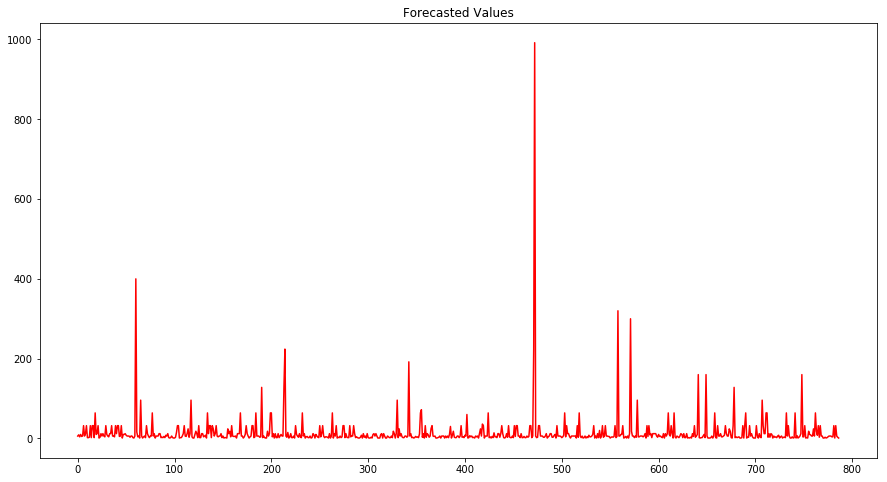

In [30]:
plt.figure(figsize=(15,8))
plt.plot(expected, color='red')
plt.title('Forecasted Values')
plt.savefig('3.jpg',dpi=100)
plt.show()

In [31]:
foo['Age'].value_counts()

19    255
13    248
16    247
12    236
18    233
14    228
15    218
10    217
17    216
11    215
Name: Age, dtype: int64

In [32]:
print('Anyone belonging to the age group between',foo["Age"].mean(),' can be targetted.')

Anyone belonging to the age group between 14.576740164288802  can be targetted.


In [33]:
print("The preferred group of people having an annual income of Rs.",foo['AnnualIncome'].mean(),"should be targeted")

The preferred group of people having an annual income of Rs. 1250737.5226977952 should be targeted


In [34]:
foo=df.ix[(df['InsuranceCode']=="22423")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


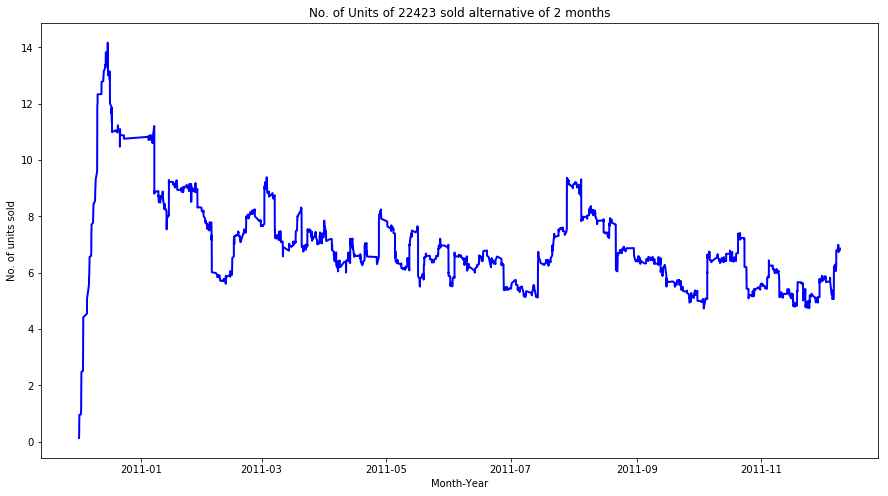

In [35]:
plt.figure(figsize=(15,8))
n = 120  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['Quantity'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('No. of units sold')
plt.title('No. of Units of 22423 sold alternative of 2 months')
plt.savefig('4.jpg',dpi=100)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
ts_insure1=foo[['InvoiceDate','Quantity']]

In [38]:
ts_insure1 = ts_insure1.reset_index(drop=True)

In [39]:
ts_insure1.dtypes

InvoiceDate    datetime64[ns]
Quantity                int64
dtype: object

In [40]:
ts_insure1['Quantity']= ts_insure1['Quantity'].astype(np.float64)

In [41]:
data = pd.Series(ts_insure1.Quantity.values, 
                 index=ts_insure1.InvoiceDate)

In [42]:
X=data.values

In [43]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
expected=[]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    expected.append(obs)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=9.726752, expected=1.000000
predicted=4.538345, expected=10.000000
predicted=4.374935, expected=1.000000
predicted=3.827279, expected=16.000000
predicted=6.756609, expected=3.000000
predicted=6.829006, expected=4.000000
predicted=5.872110, expected=1.000000
predicted=5.302129, expected=16.000000
predicted=7.154897, expected=2.000000
predicted=7.244120, expected=16.000000
predicted=7.120512, expected=16.000000
predicted=9.130320, expected=1.000000
predicted=8.963366, expected=6.000000
predicted=8.874027, expected=16.000000
predicted=9.458468, expected=2.000000
predicted=9.977877, expected=16.000000
predicted=9.421933, expected=2.000000
predicted=6.966118, expected=2.000000
predicted=7.369072, expected=2.000000
predicted=6.152281, expected=5.000000
predicted=5.054820, expected=11.000000
predicted=6.550643, expected=1.000000
predicted=3.961668, expected=1.000000
predicted=3.411579, expected=2.000000
predicted=3.346446, expected=10.000000
predicted=5.289120, expected=1.000000
pre

predicted=4.134171, expected=10.000000
predicted=5.465956, expected=10.000000
predicted=7.600502, expected=3.000000
predicted=7.415317, expected=4.000000
predicted=4.973685, expected=6.000000
predicted=5.732414, expected=4.000000
predicted=6.328858, expected=2.000000
predicted=4.764890, expected=10.000000
predicted=4.864339, expected=2.000000
predicted=4.751440, expected=2.000000
predicted=4.254509, expected=6.000000
predicted=4.124627, expected=1.000000
predicted=3.958290, expected=2.000000
predicted=3.788316, expected=1.000000
predicted=2.164038, expected=3.000000
predicted=2.590885, expected=1.000000
predicted=2.332956, expected=1.000000
predicted=1.474765, expected=2.000000
predicted=1.608546, expected=2.000000
predicted=1.719487, expected=16.000000
predicted=4.519156, expected=2.000000
predicted=4.167191, expected=2.000000
predicted=3.958505, expected=3.000000
predicted=3.984753, expected=1.000000
predicted=4.494935, expected=1.000000
predicted=4.164420, expected=1.000000
predicte

predicted=1.615991, expected=2.000000
predicted=1.470083, expected=2.000000
predicted=1.718566, expected=3.000000
predicted=1.884307, expected=16.000000
predicted=4.432359, expected=2.000000
predicted=4.696621, expected=1.000000
predicted=4.071728, expected=10.000000
predicted=5.150913, expected=10.000000
predicted=7.464503, expected=8.000000
predicted=8.215927, expected=4.000000
predicted=5.555529, expected=1.000000
predicted=5.292207, expected=6.000000
predicted=6.355356, expected=1.000000
predicted=5.111107, expected=5.000000
predicted=4.240167, expected=1.000000
predicted=2.902369, expected=1.000000
predicted=2.465827, expected=4.000000
predicted=2.908015, expected=32.000000
predicted=8.004990, expected=6.000000
predicted=9.103340, expected=2.000000
predicted=7.257544, expected=8.000000
predicted=7.541399, expected=16.000000
predicted=11.756634, expected=1.000000
predicted=11.390166, expected=1.000000
predicted=5.197398, expected=1.000000
predicted=4.210376, expected=3.000000
predi

predicted=5.995626, expected=4.000000
predicted=7.795840, expected=1.000000
predicted=7.823216, expected=4.000000
predicted=2.980481, expected=3.000000
predicted=3.365172, expected=2.000000
predicted=2.709848, expected=1.000000
predicted=2.394173, expected=3.000000
predicted=2.273421, expected=5.000000
predicted=3.108969, expected=1.000000
predicted=2.594232, expected=1.000000
predicted=2.030471, expected=2.000000
predicted=2.014507, expected=1.000000
predicted=2.219703, expected=16.000000
predicted=4.611450, expected=3.000000
predicted=4.380367, expected=1.000000
predicted=3.847962, expected=6.000000
predicted=4.260315, expected=1.000000
predicted=4.764042, expected=1.000000
predicted=4.748015, expected=1.000000
predicted=1.966523, expected=10.000000
predicted=3.500328, expected=10.000000
predicted=5.267564, expected=10.000000
predicted=5.766122, expected=1.000000
predicted=5.227018, expected=2.000000
predicted=5.208805, expected=80.000000
predicted=19.931313, expected=4.000000
predic

In [44]:
df3=pd.DataFrame(data=expected)
df3['Expected']=df3[0]
df3.drop(0,axis=1,inplace=True)
df3['Expected'].sum()

4506.0

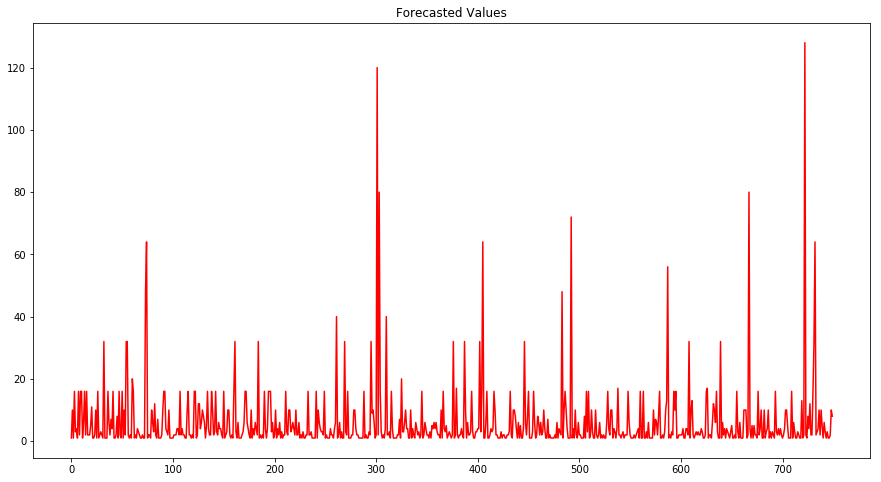

In [45]:
plt.figure(figsize=(15,8))
plt.plot(expected, color='red')
plt.title('Forecasted Values')
plt.savefig('5.jpg',dpi=100)
plt.show()

In [46]:
foo['Age'].value_counts()

21    271
28    266
22    245
24    243
27    238
29    237
23    236
25    234
26    233
Name: Age, dtype: int64

In [47]:
print('Anyone belonging to the age group between',foo["Age"].mean(),' can be targetted.')

Anyone belonging to the age group between 24.964139809350886  can be targetted.


In [48]:
print("The preferred group of people having an annual income of Rs.",foo['AnnualIncome'].mean(),"should be targeted")

The preferred group of people having an annual income of Rs. 398818.24194280524 should be targeted


In [49]:
foo=df.ix[(df['InsuranceCode']=="85099B")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


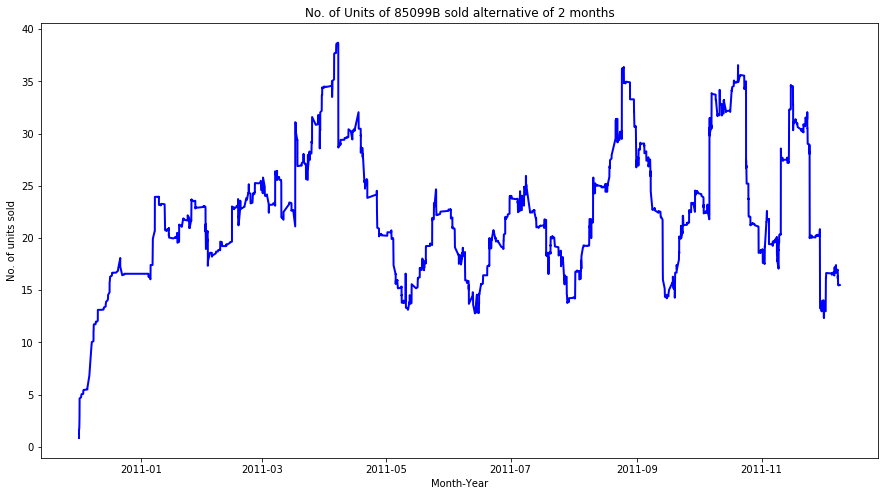

In [50]:
plt.figure(figsize=(15,8))
n = 120  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['Quantity'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('No. of units sold')
plt.title('No. of Units of 85099B sold alternative of 2 months')
plt.savefig('6.jpg',dpi=100)

In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [52]:
ts_insure1=foo[['InvoiceDate','Quantity']]

In [53]:
ts_insure1 = ts_insure1.reset_index(drop=True)

In [54]:
ts_insure1.dtypes

InvoiceDate    datetime64[ns]
Quantity                int64
dtype: object

In [55]:
ts_insure1['Quantity']= ts_insure1['Quantity'].astype(np.float64)

In [56]:
data = pd.Series(ts_insure1.Quantity.values, 
                 index=ts_insure1.InvoiceDate)

In [57]:
X=data.values

In [58]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
expected=[]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    expected.append(obs)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=14.923401, expected=3.000000
predicted=12.703036, expected=100.000000
predicted=29.705722, expected=100.000000
predicted=42.635823, expected=10.000000
predicted=38.981430, expected=2.000000
predicted=38.587103, expected=17.000000
predicted=40.403144, expected=3.000000
predicted=35.890857, expected=10.000000
predicted=20.738372, expected=10.000000
predicted=8.765761, expected=10.000000
predicted=8.691490, expected=12.000000
predicted=10.088931, expected=30.000000
predicted=13.236064, expected=30.000000
predicted=17.495588, expected=10.000000
predicted=16.627777, expected=10.000000
predicted=16.901622, expected=5.000000
predicted=16.133321, expected=4.000000
predicted=13.952433, expected=10.000000
predicted=10.887174, expected=3.000000
predicted=6.684880, expected=20.000000
predicted=8.799169, expected=4.000000
predicted=7.613582, expected=10.000000
predicted=8.328253, expected=1.000000
predicted=7.842158, expected=10.000000
predicted=8.014927, expected=20.000000
predicted=10.8

predicted=9.628698, expected=3.000000
predicted=8.106109, expected=10.000000
predicted=6.872060, expected=10.000000
predicted=6.908426, expected=50.000000
predicted=14.759729, expected=10.000000
predicted=14.871862, expected=10.000000
predicted=15.138503, expected=4.000000
predicted=15.873707, expected=5.000000
predicted=14.775018, expected=2.000000
predicted=11.921369, expected=10.000000
predicted=6.702250, expected=14.000000
predicted=7.532185, expected=10.000000
predicted=7.507579, expected=1.000000
predicted=6.739242, expected=2.000000
predicted=6.463165, expected=3.000000
predicted=6.483282, expected=1.000000
predicted=4.665374, expected=5.000000
predicted=3.354700, expected=2.000000
predicted=2.295082, expected=1.000000
predicted=2.153781, expected=30.000000
predicted=7.649746, expected=4.000000
predicted=7.289652, expected=1.000000
predicted=6.577302, expected=10.000000
predicted=8.398363, expected=10.000000
predicted=9.679570, expected=4.000000
predicted=8.785499, expected=4.00

predicted=11.458585, expected=4.000000
predicted=10.386449, expected=1.000000
predicted=7.116179, expected=3.000000
predicted=5.911181, expected=15.000000
predicted=8.193690, expected=10.000000
predicted=7.257414, expected=11.000000
predicted=7.384725, expected=2.000000
predicted=6.936738, expected=30.000000
predicted=11.753338, expected=10.000000
predicted=13.177368, expected=20.000000
predicted=13.844075, expected=10.000000
predicted=13.805755, expected=4.000000
predicted=12.454933, expected=10.000000
predicted=13.673334, expected=2.000000
predicted=9.145616, expected=6.000000
predicted=8.441165, expected=200.000000
predicted=39.657855, expected=20.000000
predicted=43.074892, expected=10.000000
predicted=41.414240, expected=5.000000
predicted=39.227495, expected=1.000000
predicted=39.033327, expected=300.000000
predicted=89.373727, expected=1.000000
predicted=59.920279, expected=140.000000
predicted=75.433493, expected=1.000000
predicted=74.931019, expected=10.000000
predicted=75.994

predicted=11.352627, expected=10.000000
predicted=10.888710, expected=1.000000
predicted=8.421230, expected=20.000000
predicted=10.831120, expected=2.000000
predicted=8.187458, expected=10.000000
predicted=8.016929, expected=10.000000
predicted=8.658357, expected=10.000000
predicted=9.099722, expected=1.000000
predicted=8.428786, expected=1.000000
predicted=5.631102, expected=22.000000
predicted=8.914567, expected=1.000000
predicted=7.616809, expected=4.000000
predicted=6.093558, expected=20.000000
predicted=8.114409, expected=3.000000
predicted=8.941073, expected=1.000000
predicted=7.901255, expected=20.000000
predicted=8.119173, expected=4.000000
predicted=9.039825, expected=10.000000
predicted=9.165761, expected=4.000000
predicted=6.931187, expected=3.000000
predicted=7.190390, expected=1.000000
predicted=6.599436, expected=10.000000
predicted=5.332774, expected=16.000000
predicted=7.243266, expected=20.000000
predicted=9.009925, expected=3.000000
predicted=8.792027, expected=20.000

In [59]:
df3=pd.DataFrame(data=expected)
df3['Expected']=df3[0]
df3.drop(0,axis=1,inplace=True)
df3['Expected'].sum()

16959.0

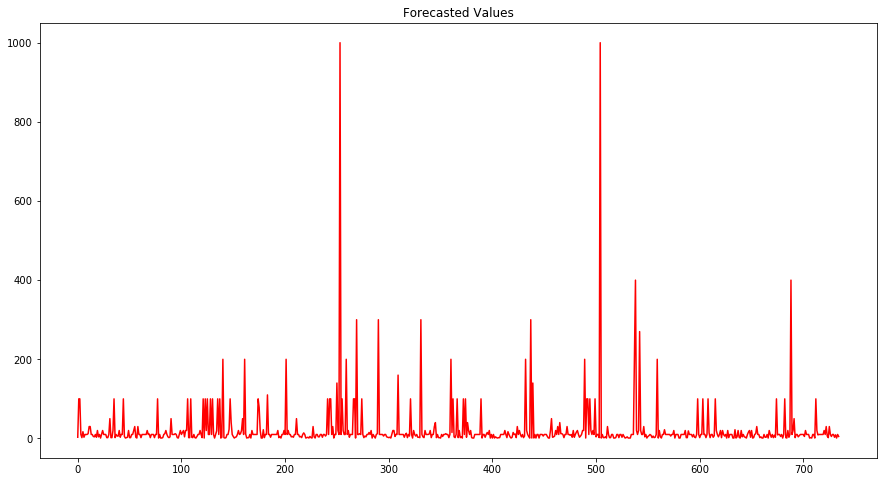

In [60]:
plt.figure(figsize=(15,8))
plt.plot(expected, color='red')
plt.title('Forecasted Values')
plt.savefig('7.jpg',dpi=100)
plt.show()

In [61]:
foo['Age'].value_counts()

28    244
27    225
29    223
30    222
34    221
25    215
32    215
31    211
26    198
33    185
Name: Age, dtype: int64

In [62]:
print('Anyone belonging to the age group between',foo["Age"].mean(),' can be targetted.')

Anyone belonging to the age group between 29.456692913385826  can be targetted.


In [63]:
print("The preferred group of people having an annual income of Rs.",foo['AnnualIncome'].mean(),"should be targeted")

The preferred group of people having an annual income of Rs. 2752738.362667902 should be targeted


In [64]:
foo=df.ix[(df['InsuranceCode']=="47566")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


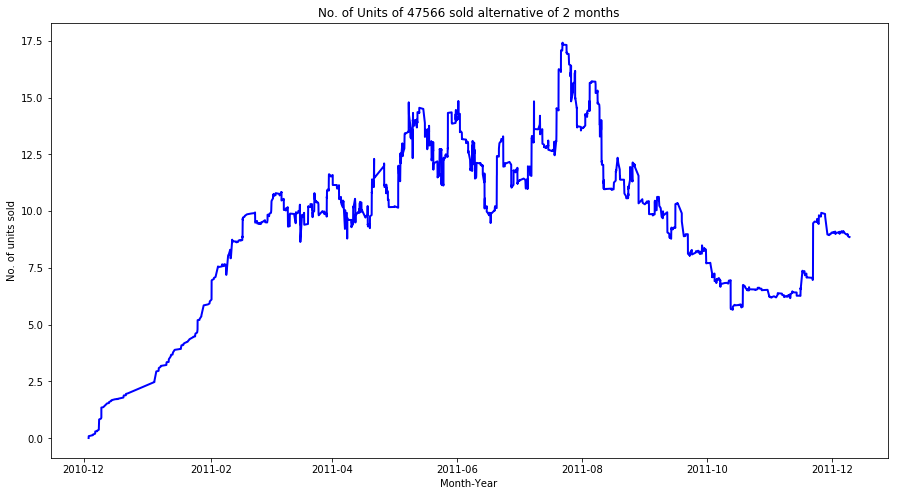

In [65]:
plt.figure(figsize=(15,8))
n = 120  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['Quantity'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('No. of units sold')
plt.title('No. of Units of 47566 sold alternative of 2 months')
plt.savefig('8.jpg',dpi=100)

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
ts_insure1=foo[['InvoiceDate','Quantity']]

In [68]:
ts_insure1 = ts_insure1.reset_index(drop=True)

In [69]:
ts_insure1.dtypes

InvoiceDate    datetime64[ns]
Quantity                int64
dtype: object

In [70]:
ts_insure1['Quantity']= ts_insure1['Quantity'].astype(np.float64)

In [71]:
data = pd.Series(ts_insure1.Quantity.values, 
                 index=ts_insure1.InvoiceDate)

In [72]:
X=data.values

In [73]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
expected=[]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    expected.append(obs)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=43.993494, expected=4.000000
predicted=33.040609, expected=100.000000
predicted=24.407507, expected=1.000000
predicted=23.479080, expected=42.000000
predicted=28.039908, expected=4.000000
predicted=27.528766, expected=50.000000
predicted=33.324031, expected=8.000000
predicted=36.451897, expected=4.000000
predicted=17.382220, expected=2.000000
predicted=17.889972, expected=2.000000
predicted=11.538513, expected=6.000000
predicted=12.939013, expected=8.000000
predicted=5.241847, expected=4.000000
predicted=4.427280, expected=4.000000
predicted=4.172665, expected=4.000000
predicted=4.529601, expected=12.000000
predicted=6.443367, expected=8.000000
predicted=6.934221, expected=4.000000
predicted=5.931927, expected=2.000000
predicted=5.376061, expected=6.000000
predicted=5.882579, expected=8.000000
predicted=6.936430, expected=4.000000
predicted=5.505197, expected=8.000000
predicted=5.244795, expected=4.000000
predicted=5.272673, expected=12.000000
predicted=7.035690, expected=2.0

predicted=2.910720, expected=1.000000
predicted=2.303515, expected=1.000000
predicted=2.058304, expected=2.000000
predicted=2.318920, expected=13.000000
predicted=4.331459, expected=2.000000
predicted=3.627151, expected=1.000000
predicted=3.256325, expected=12.000000
predicted=5.023106, expected=18.000000
predicted=8.225030, expected=8.000000
predicted=9.286466, expected=4.000000
predicted=7.301488, expected=8.000000
predicted=8.205761, expected=6.000000
predicted=9.369587, expected=8.000000
predicted=8.838930, expected=2.000000
predicted=5.976566, expected=10.000000
predicted=6.305909, expected=8.000000
predicted=7.067933, expected=4.000000
predicted=6.394149, expected=28.000000
predicted=10.131533, expected=1.000000
predicted=8.935216, expected=4.000000
predicted=9.075664, expected=5.000000
predicted=7.940545, expected=2.000000
predicted=7.342956, expected=2.000000
predicted=7.209808, expected=2.000000
predicted=2.593230, expected=8.000000
predicted=3.900240, expected=8.000000
predic

predicted=6.271517, expected=2.000000
predicted=4.343882, expected=4.000000
predicted=4.275516, expected=1.000000
predicted=3.600367, expected=2.000000
predicted=3.503271, expected=8.000000
predicted=3.891816, expected=15.000000
predicted=5.541673, expected=100.000000
predicted=22.915155, expected=4.000000
predicted=22.568453, expected=5.000000
predicted=21.589648, expected=4.000000
predicted=20.902388, expected=2.000000
predicted=21.737504, expected=2.000000
predicted=20.406383, expected=4.000000
predicted=3.491433, expected=2.000000
predicted=3.206950, expected=1.000000
predicted=2.490549, expected=8.000000
predicted=3.184272, expected=3.000000
predicted=3.410863, expected=12.000000
predicted=5.125866, expected=4.000000
predicted=5.006008, expected=18.000000
predicted=7.770831, expected=1.000000
predicted=7.664126, expected=3.000000
predicted=6.678755, expected=1.000000
predicted=6.258925, expected=1.000000
predicted=4.637798, expected=12.000000
predicted=6.220694, expected=4.000000


In [74]:
df3=pd.DataFrame(data=expected)
df3['Expected']=df3[0]
df3.drop(0,axis=1,inplace=True)
df3['Expected'].sum()

5377.0

In [75]:
#from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
#result = seasonal_decompose(expected, model='additive',freq=1)
#result.plot()

In [77]:
foo['Age'].value_counts()

37    143
31    141
36    135
44    125
35    123
32    118
41    116
43    114
38    110
34    108
39    107
40    102
33    101
30     93
42     91
Name: Age, dtype: int64

In [78]:
print('Anyone belonging to the age group between',foo["Age"].mean(),' can be targetted.')

Anyone belonging to the age group between 36.94904458598726  can be targetted.


In [79]:
print("The preferred group of people having an annual income of Rs.",foo['AnnualIncome'].mean(),"should be targeted")

The preferred group of people having an annual income of Rs. 1493253.9171974522 should be targeted


In [80]:
foo=df.ix[(df['InsuranceCode']=="20725")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


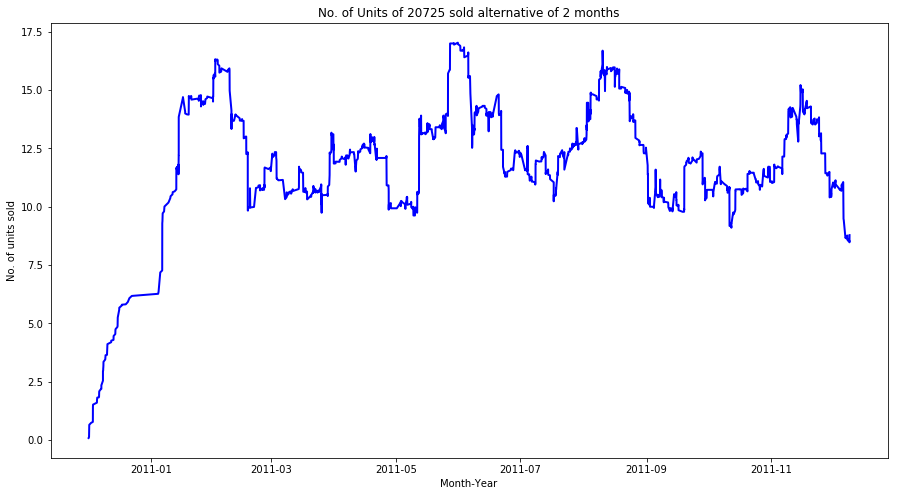

In [81]:
plt.figure(figsize=(15,8))
n = 120  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['Quantity'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('No. of units sold')
plt.title('No. of Units of 20725 sold alternative of 2 months')
plt.savefig('9.jpg',dpi=100)

In [82]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
ts_insure1=foo[['InvoiceDate','Quantity']]

In [84]:
ts_insure1 = ts_insure1.reset_index(drop=True)

In [85]:
ts_insure1.dtypes

InvoiceDate    datetime64[ns]
Quantity                int64
dtype: object

In [86]:
ts_insure1['Quantity']= ts_insure1['Quantity'].astype(np.float64)

In [87]:
data = pd.Series(ts_insure1.Quantity.values, 
                 index=ts_insure1.InvoiceDate)

In [88]:
X=data.values

In [89]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [90]:
y = [i for i in range(0, len(data))]
y = np.reshape(y, (len(y), 1))

In [91]:
model.fit(y,X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
trend = model.predict(y)

In [93]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
expected=[]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    expected.append(obs)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=13.520077, expected=1.000000
predicted=10.182056, expected=10.000000
predicted=10.657428, expected=10.000000
predicted=9.446249, expected=10.000000
predicted=7.796009, expected=2.000000
predicted=5.989529, expected=10.000000
predicted=8.086772, expected=4.000000
predicted=6.605521, expected=10.000000
predicted=8.259737, expected=10.000000
predicted=7.320476, expected=10.000000
predicted=8.118271, expected=1.000000
predicted=6.964999, expected=20.000000
predicted=10.738416, expected=10.000000
predicted=8.755064, expected=4.000000
predicted=9.738948, expected=10.000000
predicted=9.520597, expected=10.000000
predicted=8.882163, expected=10.000000
predicted=10.400047, expected=3.000000
predicted=7.441333, expected=1.000000
predicted=6.428419, expected=50.000000
predicted=16.873397, expected=10.000000
predicted=10.635791, expected=10.000000
predicted=17.519432, expected=10.000000
predicted=13.593668, expected=10.000000
predicted=14.896802, expected=3.000000
predicted=13.430651, ex

predicted=10.004414, expected=20.000000
predicted=12.196306, expected=10.000000
predicted=13.326194, expected=4.000000
predicted=12.296917, expected=10.000000
predicted=12.298922, expected=10.000000
predicted=11.454066, expected=10.000000
predicted=10.518236, expected=1.000000
predicted=6.937314, expected=10.000000
predicted=8.272193, expected=10.000000
predicted=7.915286, expected=2.000000
predicted=6.769978, expected=30.000000
predicted=12.725884, expected=10.000000
predicted=8.920088, expected=10.000000
predicted=13.496557, expected=2.000000
predicted=9.755579, expected=1.000000
predicted=8.851830, expected=3.000000
predicted=8.296658, expected=4.000000
predicted=4.610204, expected=10.000000
predicted=5.313632, expected=1.000000
predicted=3.005263, expected=2.000000
predicted=4.029749, expected=20.000000
predicted=7.691854, expected=54.000000
predicted=17.760340, expected=10.000000
predicted=14.263210, expected=2.000000
predicted=17.268707, expected=2.000000
predicted=13.944738, exp

predicted=41.640572, expected=14.000000
predicted=29.373323, expected=100.000000
predicted=46.622688, expected=10.000000
predicted=32.518107, expected=10.000000
predicted=40.734142, expected=5.000000
predicted=35.395581, expected=2.000000
predicted=20.877996, expected=1.000000
predicted=19.443247, expected=20.000000
predicted=8.808992, expected=10.000000
predicted=7.311043, expected=1.000000
predicted=6.862437, expected=20.000000
predicted=10.336372, expected=10.000000
predicted=9.235132, expected=3.000000
predicted=10.698041, expected=2.000000
predicted=7.595155, expected=1.000000
predicted=5.513883, expected=10.000000
predicted=7.690635, expected=3.000000
predicted=4.257873, expected=10.000000
predicted=5.686531, expected=3.000000
predicted=4.412170, expected=10.000000
predicted=6.795252, expected=10.000000
predicted=7.515609, expected=2.000000
predicted=6.044529, expected=2.000000
predicted=6.255527, expected=10.000000
predicted=6.300456, expected=10.000000
predicted=7.069862, expec

In [94]:
df3=pd.DataFrame(data=expected)
df3['Expected']=df3[0]
df3.drop(0,axis=1,inplace=True)
df3['Expected'].sum()

6198.0

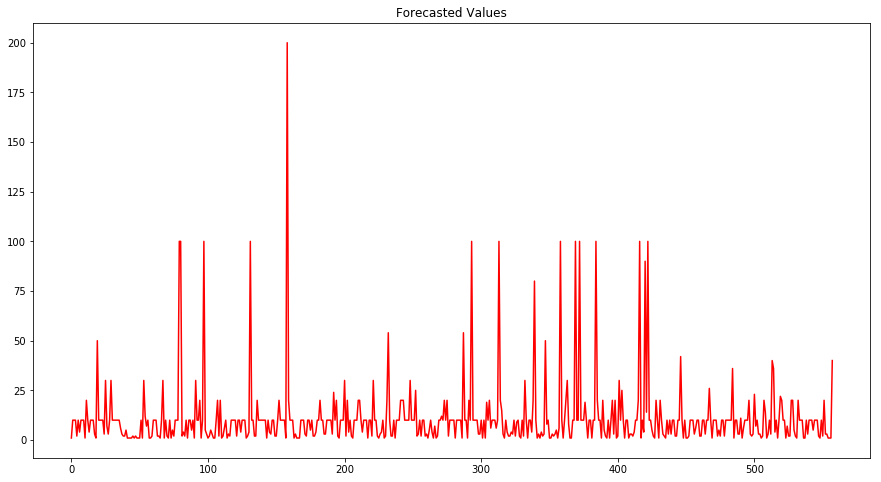

In [95]:
plt.figure(figsize=(15,8))
plt.plot(expected, color='red')
plt.title('Forecasted Values')
plt.savefig('10.jpg',dpi=100)
plt.show()

In [96]:
foo['Age'].value_counts()

47    198
48    173
41    168
44    163
46    162
40    162
45    161
49    155
42    151
43    146
Name: Age, dtype: int64

In [97]:
print('Anyone belonging to the age group between',foo["Age"].mean(),' can be targetted.')

Anyone belonging to the age group between 44.577181208053695  can be targetted.


In [98]:
print("The preferred group of people having an annual income of Rs.",foo['AnnualIncome'].mean(),"should be targeted")

The preferred group of people having an annual income of Rs. 2022774.1726662598 should be targeted
